<a href="https://colab.research.google.com/github/hyuntaedo/Deep_learning/blob/main/Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Facebook을 이용한 비트코인 시세예측
 - Prophet은 페이스북에서 제공한 시계열 예측 라이브러리
 - 빠르다
 - 정확도가 높다
 - 딥러닝 > Prophet > ARIMA순

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from fbprophet import Prophet
import pandas as pd

In [ ]:
df = pd.read_csv('market-price.csv',names=['ds','y'])
df

,ds,y
0,Timestamp,market-price
1,2020-06-25 00:00:00,9276.58
2,2020-06-26 00:00:00,9240.85
3,2020-06-27 00:00:00,9154.45
4,2020-06-28 00:00:00,9004.23
...,...,...
362,2021-06-21 00:00:00,35592.35
363,2021-06-22 00:00:00,31686.55
364,2021-06-23 00:00:00,32447.59
365,2021-06-24 00:00:00,33674.66


In [ ]:
df = df.iloc[1:]
df.dtypes

ds    object
y     object
dtype: object

In [ ]:
df['ds'] = pd.DatetimeIndex(df['ds'])
df['y'] = df['y'].astype('float64')

df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [ ]:
df

,ds,y
1,2020-06-25,9276.58
2,2020-06-26,9240.85
3,2020-06-27,9154.45
4,2020-06-28,9004.23
5,2020-06-29,9127.47
...,...,...
362,2021-06-21,35592.35
363,2021-06-22,31686.55
364,2021-06-23,32447.59
365,2021-06-24,33674.66


In [ ]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


NameError: ignored

In [ ]:
predict_date = m.make_future_dataframe(periods=30,freq='D')
predict_value = m.predict(predict_date)
predict_value.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
391,2021-07-21,23693.126967,19384.393635,28058.780783,22541.305860,24926.636250,-29.158936,-29.158936,-29.158936,-29.158936,-29.158936,-29.158936,0.0,0.0,0.0,23663.968030
392,2021-07-22,23346.949951,19280.561731,27738.854586,22097.740825,24658.686656,48.259846,48.259846,48.259846,48.259846,48.259846,48.259846,0.0,0.0,0.0,23395.209797
393,2021-07-23,23000.772936,18779.508327,27262.560442,21646.747142,24385.624953,54.229341,54.229341,54.229341,54.229341,54.229341,54.229341,0.0,0.0,0.0,23055.002277
394,2021-07-24,22654.595920,18440.248996,27026.541067,21185.765889,24117.775413,51.875594,51.875594,51.875594,51.875594,51.875594,51.875594,0.0,0.0,0.0,22706.471515
395,2021-07-25,22308.418905,18254.901384,27014.837686,20761.791940,23841.623609,33.283139,33.283139,33.283139,33.283139,33.283139,33.283139,0.0,0.0,0.0,22341.702044


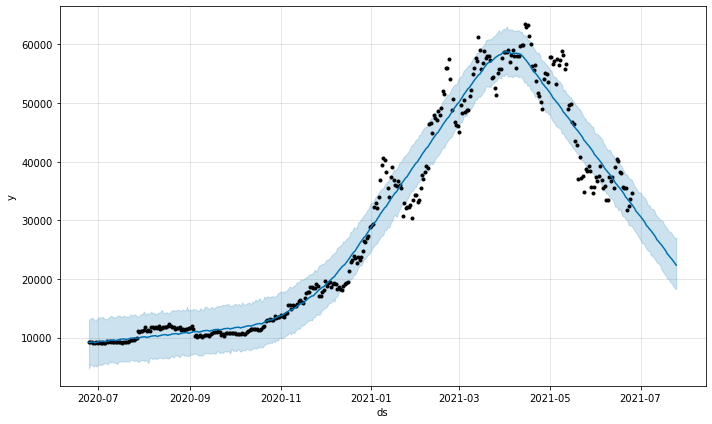

In [ ]:
plot_one = m.plot(predict_value)

- interval_width = 기본값 80, (추세의변화)로인한 95로 설정
- seasonality_mode = additive(가법모델),multiplicative(승법모드)
- yearly_seasonality = 연도별 시즌성
- changepoint_prior_scale = trend의 유연성(0.3이 기본값)

In [ ]:
m = Prophet(
    interval_width = 0.95,
    seasonality_mode = 'multiplicative',
    yearly_seasonality = True,
    changepoint_prior_scale = 0.3
)

m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
predict_date = m.make_future_dataframe(periods=30,freq='D')
predict_value = m.predict(predict_date)
predict_value.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
391,2021-07-21,83418.769706,32033.588553,39572.339514,80253.188490,86557.559531,-0.568446,-0.568446,-0.568446,-0.000603,-0.000603,-0.000603,-0.567843,-0.567843,-0.567843,0.0,0.0,0.0,35999.706523
392,2021-07-22,84005.553619,32481.444671,40750.678110,80655.804716,87349.855637,-0.562901,-0.562901,-0.562901,0.001808,0.001808,0.001808,-0.564709,-0.564709,-0.564709,0.0,0.0,0.0,36718.764814
393,2021-07-23,84592.337532,33288.119589,41344.997609,81046.115253,88055.464188,-0.556589,-0.556589,-0.556589,0.005575,0.005575,0.005575,-0.562164,-0.562164,-0.562164,0.0,0.0,0.0,37509.156432
394,2021-07-24,85179.121445,33612.633328,41436.413167,81438.855318,88795.670887,-0.559739,-0.559739,-0.559739,0.000447,0.000447,0.000447,-0.560186,-0.560186,-0.560186,0.0,0.0,0.0,37501.068940
395,2021-07-25,85765.905359,33705.635338,41268.620158,81847.365931,89546.027570,-0.560714,-0.560714,-0.560714,-0.001987,-0.001987,-0.001987,-0.558727,-0.558727,-0.558727,0.0,0.0,0.0,37675.756137


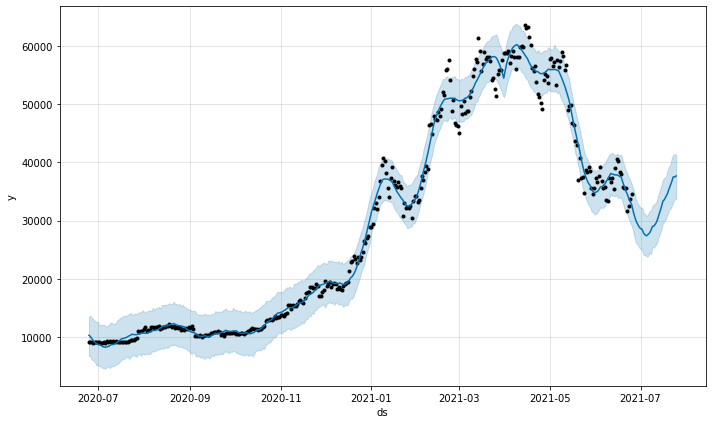

In [ ]:
plot_one = m.plot(predict_value)

In [ ]:
m = Prophet(
    interval_width = 0.95,
    seasonality_mode = 'multiplicative',
    yearly_seasonality = True,
    changepoint_prior_scale = 0.5
)

m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
predict_date = m.make_future_dataframe(periods=60,freq='D')
predict_value = m.predict(predict_date)
predict_value.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
421,2021-08-20,112521.873614,48977.359215,60619.058499,103665.978493,122904.085659,-0.516420,-0.516420,-0.516420,0.005769,0.005769,0.005769,-0.522189,-0.522189,-0.522189,0.0,0.0,0.0,54413.295367
422,2021-08-21,113192.776779,48166.715490,59817.082149,104042.665738,123828.441832,-0.522642,-0.522642,-0.522642,0.000208,0.000208,0.000208,-0.522850,-0.522850,-0.522850,0.0,0.0,0.0,54033.480774
423,2021-08-22,113863.679943,48278.700278,60045.998067,104568.214551,124719.526737,-0.526939,-0.526939,-0.526939,-0.002504,-0.002504,-0.002504,-0.524435,-0.524435,-0.524435,0.0,0.0,0.0,53864.481689
424,2021-08-23,114534.583108,47799.995669,59722.564660,105003.951004,125638.238049,-0.530519,-0.530519,-0.530519,-0.003579,-0.003579,-0.003579,-0.526940,-0.526940,-0.526940,0.0,0.0,0.0,53771.804248
425,2021-08-24,115205.486273,48188.707967,59853.696589,105403.928978,126611.705989,-0.531724,-0.531724,-0.531724,-0.001389,-0.001389,-0.001389,-0.530335,-0.530335,-0.530335,0.0,0.0,0.0,53947.971494


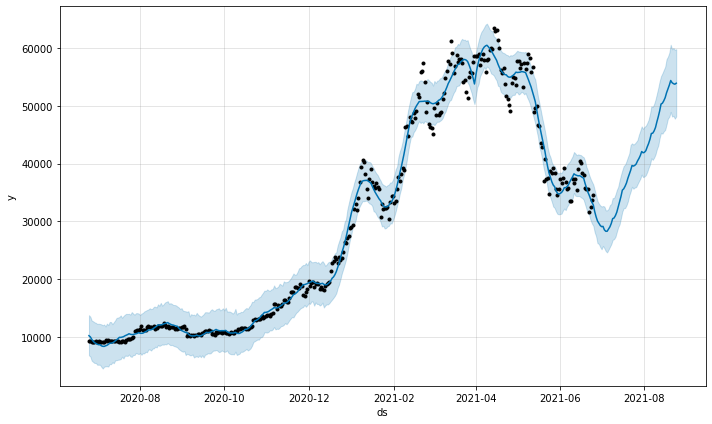

In [ ]:
plot_one = m.plot(predict_value)